In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

/home/anand/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
import tensorflow.keras.datasets.mnist as mnist

In [6]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

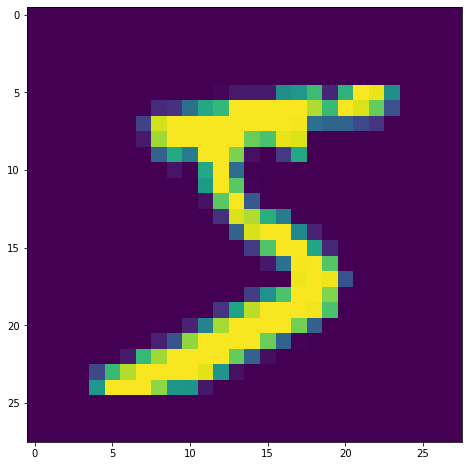

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [10]:
onlyZeros = x_train[y_train==0]

In [13]:
onlyZeros.shape

(5923, 28, 28)

In [14]:
x_train.shape

(60000, 28, 28)

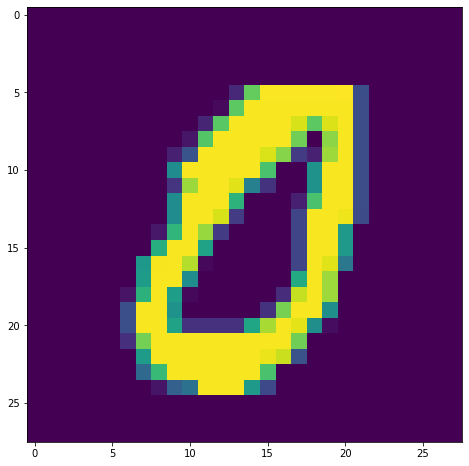

In [20]:
plt.imshow(onlyZeros[10])

###### Creating Generator and Descriminator

In [21]:
#. Descriminator

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [28]:
descriminatorModel = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(150, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
descriminatorModel.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
codingSize = 100
# 100 -->150 -->784
generatorModel = Sequential([
    Dense(100, activation='relu', input_shape=[codingSize]),
    Dense(150, activation='relu'),
    Dense(784, activation='relu'),
    Reshape([28,28])
])

In [30]:
gan = Sequential([generatorModel, descriminatorModel])

In [31]:
descriminatorModel.trainable = False

In [32]:
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
batchSize = 32

In [34]:
myDataset = onlyZeros

In [35]:
dataset = tf.data.Dataset.from_tensor_slices(myDataset).shuffle(buffer_size=1000)

In [36]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [37]:
dataset = dataset.batch(batchSize, drop_remainder=True).prefetch(1)

In [38]:
epochs =1

In [39]:
gan.layers

In [41]:
gan.layers[0].layers # generator

In [42]:
gan.layers[1].layers # descriminator

In [44]:
generatorModel, descriminatorModel = gan.layers

for epoch in range(epochs):
    print(f"currently on epoch {epoch+1}")
    i=0
    for x_batch in dataset:
        i += 1
        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(myDataset)//batchSize}")
            
        #descriminator Training phase:
        noise = tf.random.normal(shape=[batchSize, codingSize])
        genImages = generatorModel(noise)
        x_FakeVsReal = tf.concat([genImages, tf.dtypes.cast(x_batch, tf.float32)], axis=0)
        y1 = tf.constant([[0.0]]*batchSize + [[1.0]]*batchSize)
        descriminatorModel.trainable=True
        descriminatorModel.train_on_batch(x_FakeVsReal, y1)
            
        # generator Training phase :
        noise = tf.random.normal(shape=[batchSize, codingSize])
        y2 = tf.constant([1.0]*batchSize)
        descriminatorModel.trainable=False
        
        gan.train_on_batch(noise, y2)

currently on epoch 1
	 Currently on batch number 100 of 185


In [45]:
noise = tf.random.normal(shape=[10, codingSize])

In [46]:
noise.shape

TensorShape([10, 100])

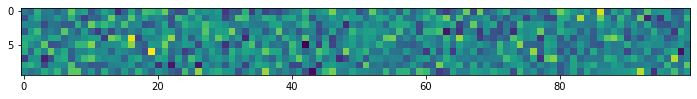

In [47]:
plt.imshow(noise)

In [48]:
images = generatorModel(noise)

In [49]:
images.shape

TensorShape([10, 28, 28])

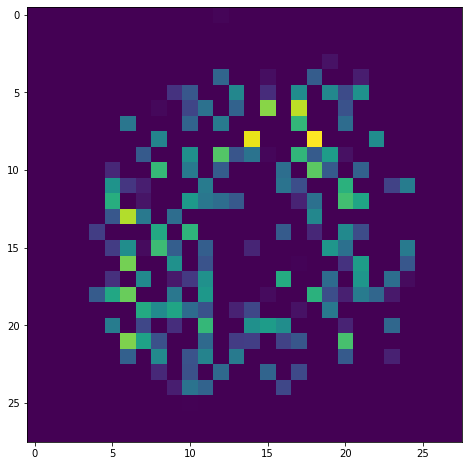

In [51]:
plt.imshow(images[0])

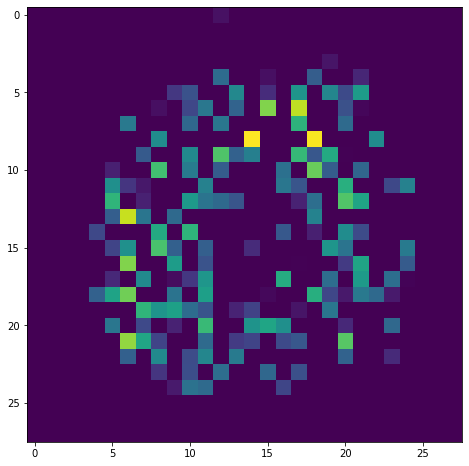

In [54]:
plt.imshow(images[1])

In [55]:
#mode collapse